In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Data extraction: Pages of Workbooks
The regulation says, since two years, that the workbooks should allocate 0.5 to 1 page to each task.
Is it feasible? Is it done?
Let's take a batch of workbooks from 2020.

In [27]:
# data is the number of pages in adv-stats in a batch of adv-workbooks
data = [29, 31, 33, 26, 16, 29, 22, 19, 26, 29, 24, 31, 20, 29, 23, 30, 53, 29, 26, 17, 29, 22, 31, 17, 21, 10, 17, 24, 18, 28, 17, 26, 34, 34, 24, 24, 30, 52, 22, 15, 28, 24, 18, 16, 19, 75, 23, 21, 13, 21, 39, 17, 32, 29, 21, 24, 28, 20, 28, 52, 21, 20, 27, 26, 16, 20, 17, 20, 29, 79, 20, 36, 24, 18, 25, 21, 25, 63, 21, 40, 28, 26, 26, 17, 19, 20, 16, 27, 27, 15, 22, 22, 33, 31, 29, 35, 25, 24, 27, 42, 13, 32, 14, 26, 20, 18, 29, 26, 14, 22, 18, 12, 23, 18, 27, 43, 25, 36, 26, 45, 21, 24, 38, 13, 16, 23, 17, 19, 18, 21, 13, 30, 17, 17, 18, 17, 23, 25, 25, 13, 27, 22, 28, 42, 25, 21, 15, 22, 20, 37, 31, 25, 25, 28, 19, 18, 22, 37, 30, 34, 22, 19, 37, 26, 19, 22, 25, 28, 32, 25, 19, 31, 29, 86, 28, 42, 46, 43, 18, 35, 34, 31, 14, 34, 30, 26, 30, 18, 14, 44, 21, 37, 27, 44, 40, 14, 21, 33, 33, 19, 23, 24, 34, 23, 43, 36, 39, 16, 19, 12, 9, 62, 26, 24, 21, 25, 25, 27, 23, 29, 34, 25, 22, 16, 20, 17, 23, 16, 39, 35, 26, 17, 28, 17, 23, 35, 19, 22, 16, 30, 24, 17, 27, 33, 25, 26, 27, 15, 26, 26, 23, 23, 45, 19, 24, 18, 24, 15, 37, 17, 21, 21, 15, 21, 20, 33, 35, 19, 45, 30, 35, 29, 19, 22, 15, 42, 24, 16, 26, 12, 31, 29, 29, 44, 20, 46, 35, 11, 31, 23, 35, 18, 86, 12, 35, 14, 30, 24, 9, 45, 23, 27, 27, 22, 25, 27, 20, 26, 45, 21, 26, 23, 38, 26, 37, 15, 27, 37, 23, 28, 22, 20, 13, 12, 34, 26, 12, 22, 25, 22, 20, 27, 59, 26, 15, 26, 26, 15, 53, 12, 22, 35, 21, 38, 41, 55, 21, 24, 14, 20, 58, 43, 11, 23, 21, 44, 47, 15, 24, 28, 22, 13, 15, 19, 30, 28, 23, 54, 21, 29, 22, 33, 15, 16, 28, 14, 53, 12, 17, 17, 37, 19, 30, 14, 18, 15, 19, 23, 27, 13, 26, 42, 44, 20, 26, 19, 35, 20, 25, 25, 21, 18, 41, 16, 24, 22, 31, 15, 12, 31, 33, 34, 18, 8, 24, 26, 25, 30, 12, 20, 88, 32, 16, 17, 27, 22, 33, 33, 20, 32, 34, 27, 23, 21, 26, 20, 30, 31, 16, 20, 36, 36, 26, 18, 29, 29, 27, 29, 18, 21, 23, 20, 25, 29, 40, 21, 24, 19, 20, 32, 23, 47, 47, 24, 26, 36, 32, 21, 26, 40, 18, 24, 30, 20, 10, 34, 20, 23, 27, 31, 20, 29, 42, 25, 32, 25, 27, 25, 34, 32, 30, 16, 28, 19, 25, 21, 23, 22, 23, 28, 19, 14, 27, 42]
np.sum(data)

np.int64(13252)

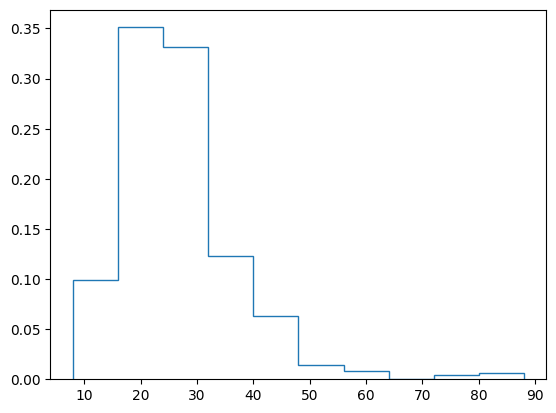

In [20]:
# Exploration: plot a histogram of the frequency of each 10-pages' segment
counts, bins = np.histogram(data)
counts = counts/504
plt.stairs(counts, bins); plt.title = 'Histogram of the counts of the number of pages'

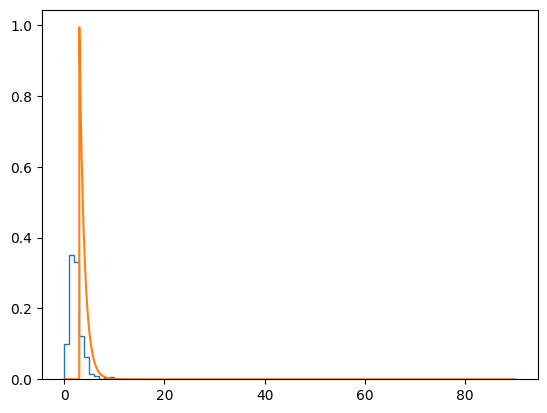

In [30]:
## Maybe a normal distribution?

linspace = np.linspace(0,90, 10000)
plt.stairs(np.histogram(data)[0]/len(data))
plt.plot(linspace, list(map(lambda x: scipy.stats.expon(3).pdf(x), linspace)), label='density function')
# plt.xlabel('X'); plt.ylabel('Y'); plt.title('Pages of workbooks as normal?')
plt.show()
# print("Probability of being negative? " + str(scipy.stats.norm(3,1).cdf(0)))

# Maximum Likelihoold Example
Let's evaluate our data for an exponential distribution.
Parameters: $\lambda$.
Density functions:
$$P(X<t) = \int_0^t \lambda\cdot e^{-\lambda x} dx$$

The likelihood for a continuous random variable is the product of the density functions for each the data points happened, considering each of them as independent random variable.


$${\mathcal L_f}(x_1, \ldots, x_n) = \prod_{i=1}^{n} f_X(x_i) = \prod_{i=1}^n \lambda\cdot e^{-\lambda x}$$


we have to maximize this function
$$ L(\lambda) = \lambda^n \cdot e^{-\lambda\cdot \sum_i x_i}$$

Let's log that, so we calculate the maximum easier.
Indeed, $x$ is a maximum of $f$ iff $\forall y , f(x)\geq f(y)$.
But $\log$ is monotonous increasing so $a\geq b \iff \log a \geq \log b$.
Hence $x$ is a maximum of $f$ iff $\forall y , f(x)\geq f(y) \iff \log f(y) \geq \log f(y)$  iff $x$ is a maximum of $\log \circ f$. Thus we just calculate the maximum for $\log\circ f$:

$$ log(\lambda^{504})-\lambda \cdot 13252 = 504 \log(\lambda)-13252\lambda$$

Deriving:

$$ 504/\lambda - 13252$$

which we equate to 0

$$ \lambda = 504/13252$$

In [28]:
504/13252

0.038031995170540296

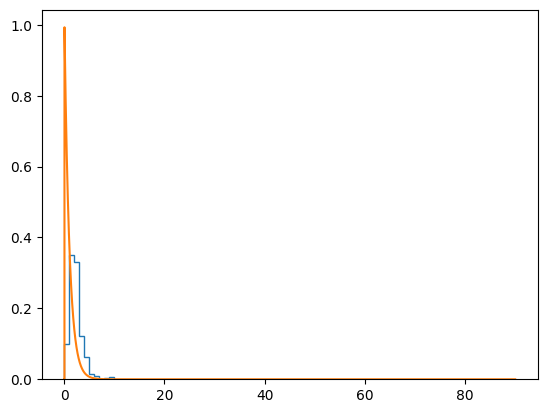

In [29]:
linspace = np.linspace(0,90, 10000)
plt.stairs(np.histogram(data)[0]/len(data))
plt.plot(linspace, list(map(lambda x: scipy.stats.expon(504/13252).pdf(x), linspace)), label='density function')
# plt.xlabel('X'); plt.ylabel('Y'); plt.title('Pages of workbooks as normal?')
plt.show()